# COGS 108 Final Project

Team Members: Thalal Cassim, Kevin Chen, Yongji Shen, Ansuman Somasundaram, Wei Zeng

# Data Wrangling

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

In [25]:
suicide.isnull().any()
suicideHDI = suicide.dropna()
#print(suicideHDI)
#print(suicide)

In [87]:
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
for i in range(len(selected)):
    suicide_sex_tmp.append(suiide_sex_tmp,suicide_sex[suicide_sex['country']== selected[i]]) #= suicide_sex[suicide_sex['country']== selected[i]]
print(suicide_sex_tmp)
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','population','HDI for year']]

NameError: name 'suiide_sex_tmp' is not defined

In [72]:
# cols = [col for col in Sales.columns if col not in ['Name','Year_of_Release', 'Global_Sales','User_Score','User_Count']]
# #print(cols)
# Sales = Sales.drop(cols,1)
# #print(Sales_tmp.shape[0])
# #Sales.head()
# #Sales.head()
# Sales = Sales[pd.notnull(Sales['User_Score'])]
# Sales = Sales[pd.notnull(Sales['User_Count'])]
# Sales = Sales[Sales.User_Score != 'tbd']
# Sales['User_Score'] = Sales['User_Score'].astype(float)
# #Sales.head()
print(suicide_sex)
country = suicide_sex["country"].unique()
#print(country)
#df.iloc[[2]]
#print(suicide_sex.loc[[0]])
male_count = 0
for i in range(0,13):
    #print(suicide_sex.loc[[i]])
    #print(suicide_sex.loc[[i]]['sex'])
    if (suicide_sex.loc[[i]]['sex'].item() == 'male'):
        male_count += suicide_sex.loc[[i]]['suicides_no'].item()
print(male_count)
#for i range(len(suicide_sex)):
    

#for i in range()

          country  year     sex  suicides_no  population
0         Albania  1987    male           21      312900
1         Albania  1987    male           16      308000
2         Albania  1987  female           14      289700
3         Albania  1987    male            1       21800
4         Albania  1987    male            9      274300
5         Albania  1987  female            1       35600
6         Albania  1987  female            6      278800
7         Albania  1987  female            4      257200
8         Albania  1987    male            1      137500
9         Albania  1987  female            0      311000
10        Albania  1987  female            0      144600
11        Albania  1987    male            0      338200
12        Albania  1988  female            2       36400
13        Albania  1988    male           17      319200
14        Albania  1988    male            1       22300
15        Albania  1988    male           14      314100
16        Albania  1988    male

# Data Visualization

In [56]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

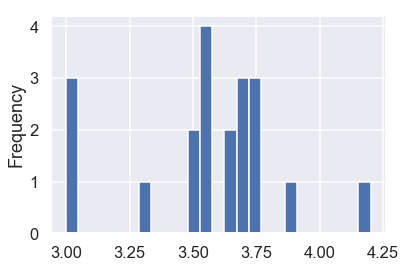

In [57]:
Fortnite_df['winter.GPA'].plot('hist', bins = 25)
f1 = plt.gcf()

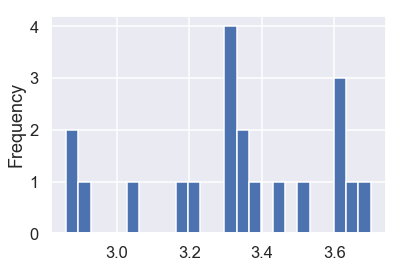

In [58]:
Fortnite_df['cumulative GPA? '].plot('hist', bins = 25)
f2 = plt.gcf()

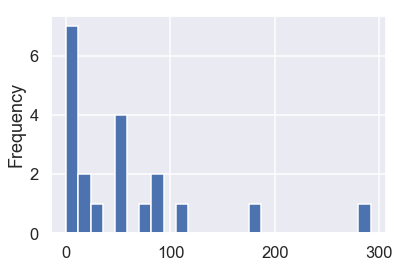

In [59]:
Fortnite_df['total.time'].plot('hist', bins = 25)
f3 = plt.gcf()

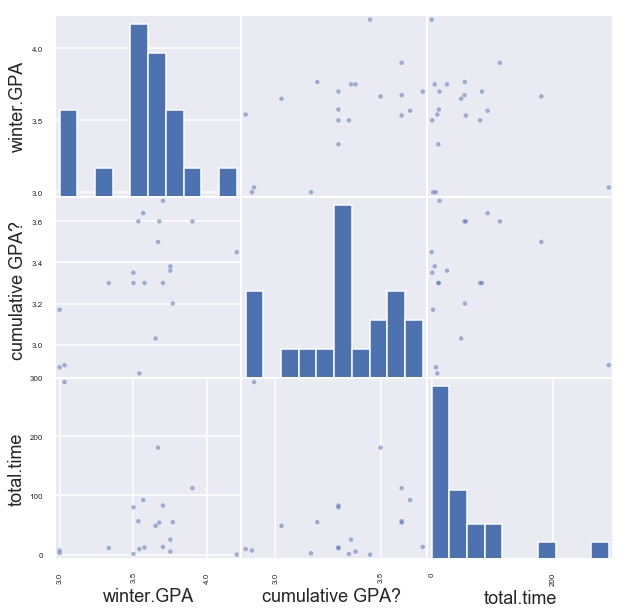

In [60]:
pd.plotting.scatter_matrix(Fortnite_df[['winter.GPA', 'cumulative GPA? ', 'total.time']], figsize = (10, 10))
f4 = plt.gcf()

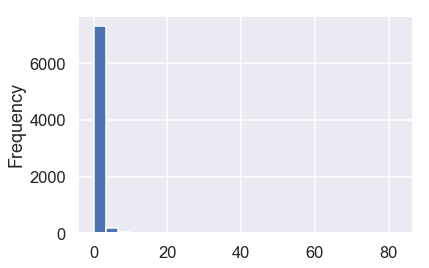

In [61]:
Sales['Global_Sales'].plot('hist', bins = 25)
f5 = plt.gcf()

0        8.0
2        8.3
3        8.0
        ... 
16700    5.8
16706    7.2
16709    5.8
Name: User_Score, Length: 7590, dtype: float64


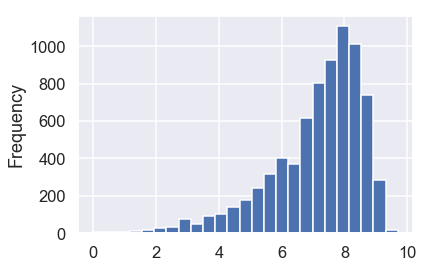

In [62]:
print(Sales['User_Score'])
Sales['User_Score'].plot('hist', bins = 25)
f6 = plt.gcf()

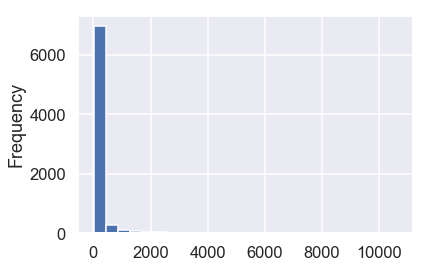

In [63]:
Sales['User_Count'].plot('hist', bins = 25)
f7 = plt.gcf()

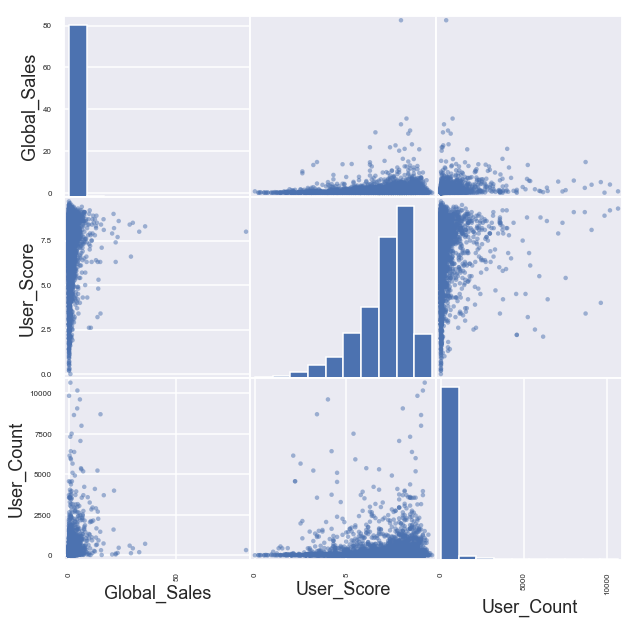

In [64]:
pd.plotting.scatter_matrix(Sales[['Global_Sales', 'User_Score', 'User_Count']], figsize = (10, 10))
f8 = plt.gcf()

In [ ]:
# Try correlation btwn year/sales, year/scores, sales/scores and vice versa
